### 기업 프로젝트 가상환경 구축
- 가상환경 이름 : commate
- 필요한 라이브러리 : Pytorch, Pandas, matplotlib, seaborn, scikit-learn, numpy, torchvision, torchaudio

## 데이터 확인
- 데이터셋 : 바웰공정데이터(1차 데이터)
- 컬럼 : time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
- 학습방법 : 지도학습
- 학습알고리즘 : 미정

[1] 데이터 준비

In [1]:
## 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\KDP-14\anaconda3\envs\commate\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## 데이터 셋 DF로 전환
dataDF = pd.read_csv('../기업 프로젝트/바웰공정데이터(1차데이터).csv')

In [3]:
dataDF

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18T15:09:19.018900Z,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18T15:09:20.128150Z,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,2023-05-18T15:12:38.819460Z,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,2023-05-18T15:12:39.958188Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,2023-05-18T15:12:41.050178Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
...,...,...,...,...,...,...,...,...,...,...,...,...
143086,2023-09-08T07:31:06.492990Z,8,8,70.4,70,185,180,66.7,70,3.06,66.9,70
143087,2023-09-08T07:31:07.511808Z,8,8,70.4,70,185,180,66.6,70,0.00,66.8,70
143088,2023-09-08T07:31:08.562880Z,8,8,70.3,70,185,180,66.7,70,0.00,66.7,70
143089,2023-09-08T07:31:09.598235Z,8,8,70.4,70,185,180,66.7,70,0.00,66.6,70


In [4]:
# rpm 실제값이 0인 부분은 모두 지움
dataDF=dataDF[dataDF['k_rpm_pv'] != 0]
dataDF


,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18T15:09:19.018900Z,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18T15:09:20.128150Z,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,2023-05-18T15:12:38.819460Z,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,2023-05-18T15:12:39.958188Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,2023-05-18T15:12:41.050178Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
...,...,...,...,...,...,...,...,...,...,...,...,...
143086,2023-09-08T07:31:06.492990Z,8,8,70.4,70,185,180,66.7,70,3.06,66.9,70
143087,2023-09-08T07:31:07.511808Z,8,8,70.4,70,185,180,66.6,70,0.00,66.8,70
143088,2023-09-08T07:31:08.562880Z,8,8,70.3,70,185,180,66.7,70,0.00,66.7,70
143089,2023-09-08T07:31:09.598235Z,8,8,70.4,70,185,180,66.7,70,0.00,66.6,70


In [5]:
# 데이터 info 확인
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139926 entries, 0 to 143090
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       139926 non-null  object 
 1   E_scr_pv   139926 non-null  int64  
 2   E_scr_sv   139926 non-null  int64  
 3   c_temp_pv  139926 non-null  float64
 4   c_temp_sv  139926 non-null  int64  
 5   k_rpm_pv   139926 non-null  int64  
 6   k_rpm_sv   139926 non-null  int64  
 7   n_temp_pv  139926 non-null  float64
 8   n_temp_sv  139926 non-null  int64  
 9   scale_pv   139926 non-null  float64
 10  s_temp_pv  139926 non-null  float64
 11  s_temp_sv  139926 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 13.9+ MB


In [6]:
dataDF.describe()
# E_scr_pv에 min 값이 0이 존재함. => value_counts 찍어봐야함.
# k_rpm_pv에 min 값이 0이 존재함. => value_counts 찍어봐야함.

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
count,139926.000000,139926.000000,139926.000000,139926.0,139926.000000,139926.000000,139926.000000,139926.000000,139926.000000,139926.000000,139926.0
mean,7.997613,7.997613,70.461049,70.0,178.373133,174.469434,67.928452,69.975987,8.399298,67.732999,70.0
std,0.096136,0.096136,0.434395,0.0,8.484794,11.515240,1.163117,1.296273,70.935318,1.298004,0.0
min,7.000000,7.000000,68.000000,70.0,39.000000,130.000000,57.700000,0.000000,0.000000,65.500000,70.0
25%,8.000000,8.000000,70.200000,70.0,175.000000,180.000000,67.000000,70.000000,0.000000,66.600000,70.0
50%,8.000000,8.000000,70.400000,70.0,178.000000,180.000000,67.500000,70.000000,0.000000,67.600000,70.0
75%,8.000000,8.000000,70.700000,70.0,183.000000,180.000000,68.800000,70.000000,0.000000,68.400000,70.0
max,12.000000,12.000000,72.800000,70.0,198.000000,180.000000,71.200000,70.000000,655.350000,72.400000,70.0


<hr>

E_scr : 압출

In [7]:
dataDF['E_scr_pv'].value_counts()

E_scr_pv
8     139352
7        526
12        48
Name: count, dtype: int64

In [8]:
dataDF['E_scr_sv'].value_counts()

E_scr_sv
8     139352
7        526
12        48
Name: count, dtype: int64

In [9]:
# E_scr_pv가 0인 값 확인하기
E_scr_DF = dataDF[dataDF['E_scr_pv'] == 0]

- 압출 설정값이 8인 부분(142517 = 139352 + 3165)에서 차이가 있는 것으로 보임.
- 실제 rpm 값이 0인 부분을 지우니까 압출 실제값 0인 부분이 사라짐.(3165개)
<hr>

c_temp : 챔버온도

In [10]:
dataDF['c_temp_pv'].value_counts().index

Index([70.3, 70.4, 70.5, 70.2, 70.6, 70.1, 70.8, 70.7, 70.9, 70.0, 71.0, 71.2,
       71.1, 69.9, 71.3, 69.8, 69.7, 69.5, 69.6, 71.4, 69.4, 71.5, 71.6, 69.3,
       71.7, 69.2, 71.8, 69.1, 69.0, 68.9, 71.9, 72.7, 68.8, 72.8, 68.0],
      dtype='float64', name='c_temp_pv')

(array([1.0000e+00, 2.0000e+01, 1.6120e+03, 1.1778e+04, 4.6433e+04,
        5.2831e+04, 2.4499e+04, 2.7270e+03, 1.1000e+01, 1.4000e+01]),
 array([68.  , 68.48, 68.96, 69.44, 69.92, 70.4 , 70.88, 71.36, 71.84,
        72.32, 72.8 ]),
 <BarContainer object of 10 artists>)

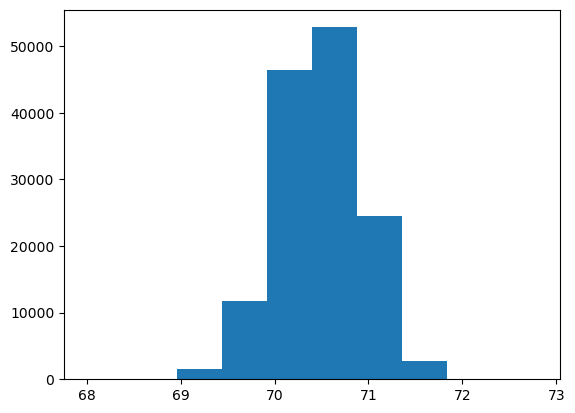

In [11]:
plt.hist(dataDF['c_temp_pv'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24901f8ddc0>,
 'caps': [<matplotlib.lines.Line2D at 0x24901fa1340>,
 'boxes': [<matplotlib.lines.Line2D at 0x24901f8db20>],
 'medians': [<matplotlib.lines.Line2D at 0x24901fa1880>],
 'fliers': [<matplotlib.lines.Line2D at 0x24901fa1b20>],
 'means': []}

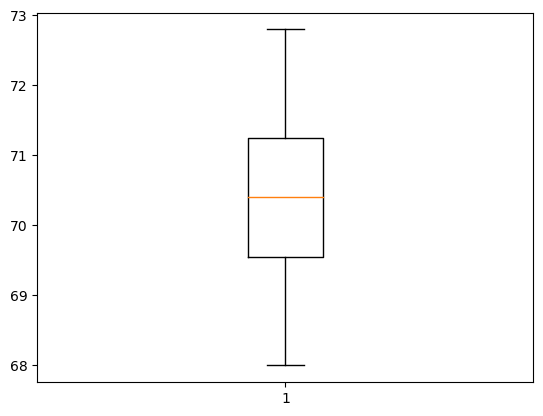

In [12]:
plt.boxplot(dataDF['c_temp_pv'].value_counts().index)

In [13]:
dataDF['c_temp_sv'].value_counts()

c_temp_sv
70    139926
Name: count, dtype: int64


<hr>

### scale

(array([104.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  18.]),
 array([  0.   ,  65.535, 131.07 , 196.605, 262.14 , 327.675, 393.21 ,
        458.745, 524.28 , 589.815, 655.35 ]),
 <BarContainer object of 10 artists>)

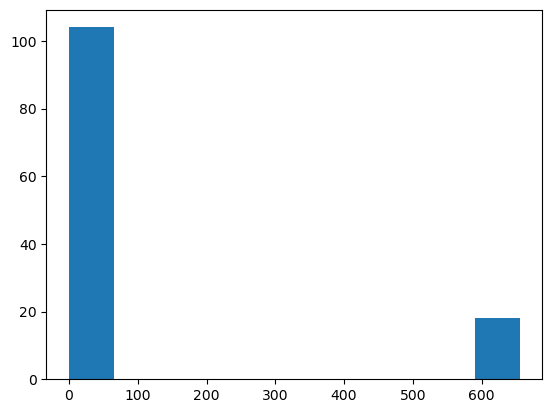

In [14]:
plt.hist(dataDF['scale_pv'].value_counts().index)

In [15]:
dataDF['scale_pv'].value_counts().sort_index()

scale_pv
0.00      108154
0.01         204
0.02         291
0.03         163
0.04          55
           ...  
655.31       117
655.32        90
655.33       101
655.34       143
655.35       205
Name: count, Length: 122, dtype: int64

In [16]:
# 중량 값 종류 확인
list(dataDF['scale_pv'].value_counts().index.sort_values())
# 어디까지가 물이고 어디까지가 고무고 어디까지가 사람 손이냐
# 2.0 = 1개 -> 버림(개수가 적고 유효한 값이 아니라고 판단)
# 

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.1,
 0.11,
 0.12,
 0.13,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.39,
 0.82,
 0.85,
 2.0,
 2.56,
 2.57,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.19,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.29,
 3.34,
 3.35,
 3.37,
 3.41,
 3.43,
 3.49,
 3.59,
 3.84,
 3.85,
 4.0,
 4.03,
 4.04,
 4.07,
 9.17,
 9.18,
 15.1,
 15.3,
 655.04,
 655.19,
 655.2,
 655.21,
 655.22,
 655.23,
 655.24,
 655.25,
 655.26,
 655.27,
 655.28,
 655.29,
 655.3,
 655.31,
 655.32,
 655.33,
 655.34,
 655.35]

In [35]:
dataDF[dataDF['scale_pv']==4.0]

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
7393,2023-06-30T16:44:29.425310Z,12,12,72.8,70,140,130,64.8,0,4.0,68.2,70
7394,2023-06-30T16:44:29.866246Z,12,12,72.8,70,140,130,64.8,0,4.0,68.3,70
7395,2023-06-30T16:44:30.295021Z,12,12,72.8,70,140,130,64.7,0,4.0,68.2,70
7396,2023-06-30T16:44:30.716846Z,12,12,72.7,70,140,130,64.8,0,4.0,68.2,70


In [18]:
dataDF[(dataDF['scale_pv'] <= 3.17) & (dataDF['scale_pv'] >= 2.94)]

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18T15:09:19.018900Z,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18T15:09:20.128150Z,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,2023-05-18T15:12:38.819460Z,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,2023-05-18T15:12:39.958188Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,2023-05-18T15:12:41.050178Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
...,...,...,...,...,...,...,...,...,...,...,...,...
143078,2023-09-08T07:30:58.197120Z,8,8,70.3,70,185,180,66.7,70,3.01,67.7,70
143081,2023-09-08T07:31:01.302298Z,8,8,70.4,70,185,180,66.8,70,3.03,67.3,70
143082,2023-09-08T07:31:02.368971Z,8,8,70.4,70,185,180,66.7,70,3.03,67.2,70
143086,2023-09-08T07:31:06.492990Z,8,8,70.4,70,185,180,66.7,70,3.06,66.9,70


<hr>

### rpm

In [19]:
rpm_pv = dataDF['k_rpm_pv'].value_counts().sort_index()

In [20]:
idx = rpm_pv.index
val = rpm_pv.values

In [21]:
rpm_pv.head(60)

k_rpm_pv
39         1
40        94
117        1
118       11
119        2
120        1
122        6
123        2
124       54
125        4
126       15
127        9
129       65
130        1
131       34
132       59
133        1
134       94
135        5
136       29
137       25
138       67
139        6
140       41
141       68
142       38
143       87
144       32
145       80
146       24
147      166
148      131
149      101
150      145
151       80
152      146
153       84
154      209
155      210
156      168
157      221
158      240
159      510
160      357
161      374
162      212
163      458
164      446
165      517
166      783
167      815
168     1344
169      927
170     2002
171     1641
172     3380
173     2651
174    12700
175     7953
176    13086
Name: count, dtype: int64

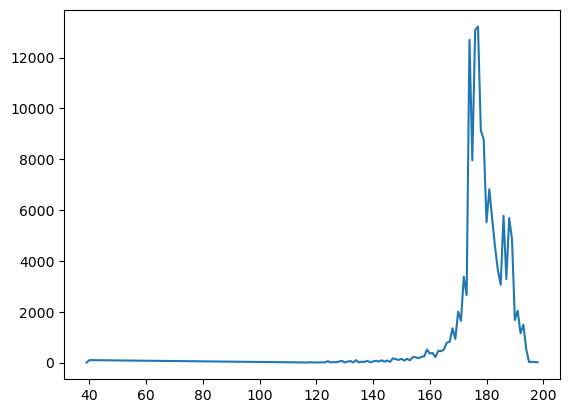

In [22]:
plt.plot(idx,val)

In [23]:
idx

Index([ 39,  40, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198],
      dtype='int64', name='k_rpm_pv')

In [24]:
dataDF['k_rpm_sv'].value_counts()

k_rpm_sv
180    112729
150     24999
170      2150
130        48
Name: count, dtype: int64

In [25]:
dataDF['n_temp_sv'].value_counts()

n_temp_sv
70    139878
0         48
Name: count, dtype: int64

<hr>

In [26]:
dataDF['s_temp_pv'].value_counts().index.sort_values()

Index([65.5, 65.6, 65.7, 65.8, 65.9, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6,
       66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8,
       67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69.0,
       69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8, 69.9, 70.0, 70.1, 70.2,
       70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.1, 71.2, 71.3, 71.4,
       71.5, 72.4],
      dtype='float64', name='s_temp_pv')

{'whiskers': [<matplotlib.lines.Line2D at 0x249022bf730>,
 'caps': [<matplotlib.lines.Line2D at 0x249022bfb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x249022bf490>],
 'medians': [<matplotlib.lines.Line2D at 0x249022cf0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249022cf370>],
 'means': []}

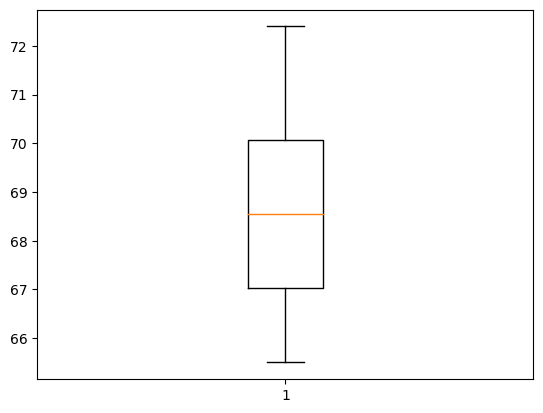

In [27]:
plt.boxplot(dataDF['s_temp_pv'].value_counts().index.sort_values())

(array([1.2261e+04, 3.0626e+04, 2.5124e+04, 2.6545e+04, 2.2139e+04,
        9.3650e+03, 6.8280e+03, 5.8580e+03, 1.1790e+03, 1.0000e+00]),
 array([65.5 , 66.19, 66.88, 67.57, 68.26, 68.95, 69.64, 70.33, 71.02,
        71.71, 72.4 ]),
 <BarContainer object of 10 artists>)

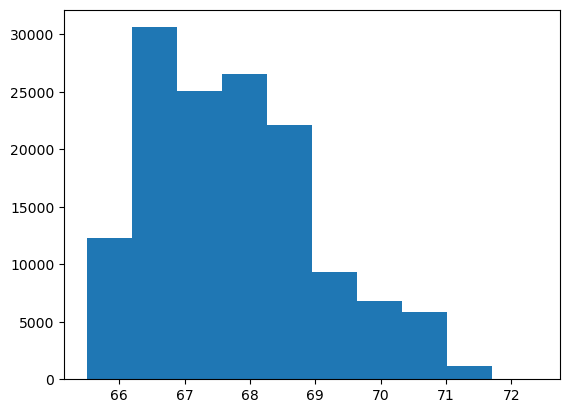

In [28]:
plt.hist(dataDF['s_temp_pv'])

In [29]:
dataDF[dataDF['s_temp_pv']<70]

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18T15:09:19.018900Z,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18T15:09:20.128150Z,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,2023-05-18T15:12:38.819460Z,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,2023-05-18T15:12:39.958188Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,2023-05-18T15:12:41.050178Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
...,...,...,...,...,...,...,...,...,...,...,...,...
143086,2023-09-08T07:31:06.492990Z,8,8,70.4,70,185,180,66.7,70,3.06,66.9,70
143087,2023-09-08T07:31:07.511808Z,8,8,70.4,70,185,180,66.6,70,0.00,66.8,70
143088,2023-09-08T07:31:08.562880Z,8,8,70.3,70,185,180,66.7,70,0.00,66.7,70
143089,2023-09-08T07:31:09.598235Z,8,8,70.4,70,185,180,66.7,70,0.00,66.6,70


In [30]:
dataDF[dataDF['s_temp_pv']>=70]

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
21,2023-05-18T15:19:44.420958Z,8,8,69.4,70,189,180,70.3,70,3.05,70.8,70
22,2023-05-18T15:19:44.858629Z,8,8,69.5,70,189,180,70.3,70,3.05,70.8,70
23,2023-05-18T15:19:45.299394Z,8,8,69.4,70,189,180,70.4,70,3.04,70.8,70
24,2023-05-18T15:19:45.767063Z,8,8,69.4,70,189,180,70.4,70,3.04,70.8,70
25,2023-05-18T15:19:46.208047Z,8,8,69.5,70,189,180,70.5,70,3.04,70.9,70
...,...,...,...,...,...,...,...,...,...,...,...,...
141326,2023-09-08T07:00:21.652482Z,8,8,71.0,70,186,180,68.9,70,3.06,70.0,70
141384,2023-09-08T07:01:22.257819Z,8,8,71.0,70,186,180,69.4,70,3.05,70.1,70
141385,2023-09-08T07:01:23.323357Z,8,8,71.0,70,186,180,69.4,70,3.06,70.1,70
141386,2023-09-08T07:01:24.374326Z,8,8,71.0,70,186,180,69.3,70,0.00,70.1,70


In [31]:
dataDF['s_temp_sv'].value_counts()

s_temp_sv
70    139926
Name: count, dtype: int64